In [163]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets, preprocessing, tree, model_selection,svm
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.svm import SVR, LinearSVC
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score, train_test_split, cross_val_predict, StratifiedKFold
import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix, precision_recall_curve, average_precision_score, roc_curve, auc, mean_absolute_error
from scipy import interp
from ggplot import *
import re
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import nltk
lemma = nltk.wordnet.WordNetLemmatizer()
from nltk.stem.snowball import SnowballStemmer
sb = SnowballStemmer("english")
from nltk.stem.porter import *
from sklearn.tree import DecisionTreeRegressor
stemmer = PorterStemmer()
from sklearn.ensemble import GradientBoostingRegressor as GBR
from sklearn.ensemble import AdaBoostRegressor as ABR
from sklearn.neural_network import MLPRegressor as NN
from sklearn.neighbors import KNeighborsRegressor 
from statsmodels.tools.eval_measures import rmse

In [168]:
def calculate_mape(y_true,y_pred):
    mape=np.mean(np.abs((y_true - y_pred) / y_true)) *100
    # rmse(y_true,y_pred)
    return mape

def to_tfidf(df):
    df['snippet']=df['snippet'].apply(lambda words: tokenizer.tokenize(words))
    df['snippet']=df['snippet'].apply(lambda word: [sb.stem(item) for item in word if item not in stop])
    df['snippet']=df['snippet'].apply(lambda word: ' '.join(word))
    X_train_tfidf = TfidfVectorizer(max_df=0.8, min_df=0.05).fit_transform(df['snippet'])
    actual=df['twitter']
    return X_train_tfidf,actual
   
def run_svr(predictors,target):
    #rtree = DecisionTreeRegressor(max_depth=25)
    rtree = SVR()
    predicted_rtree=cross_val_predict (rtree, predictors,target, cv=10)
    mape_rtree=calculate_mape(target,predicted_rtree)
    return mape_rtree

def run_nn(predictors,target):
    #rtree = DecisionTreeRegressor(max_depth=25)
    rtree = NN()
    predicted_rtree=cross_val_predict (rtree, predictors,target, cv=10)
    mape_rtree=calculate_mape(target,predicted_rtree)
    return predicted_rtree

def run_abr(predictors,target):
    #rtree = DecisionTreeRegressor(max_depth=25)
    rtree = ABR()
    predicted_rtree=cross_val_predict (rtree, predictors,target, cv=10)
    mape_rtree=calculate_mape(target,predicted_rtree)
    return predicted_rtree


In [131]:
nytData=pd.read_csv("C:\\Users\\venka\\Documents\\Fall Semester\\Predictive Analytics\\Project/nyt_data.txt",sep='\t')
topics=pd.read_csv("C:\\Users\\venka\\Documents\\Fall Semester\\Predictive Analytics\\Project/results DocsToTopics.csv")

In [132]:
nytDataV1=nytData.drop('headline_main',axis=1)
nytDataV1=nytDataV1.drop('word_count',axis=1)

In [133]:
nytDataV1 = nytDataV1[nytDataV1['facebook_like_count']!= 0 ]
nytDataV1 = nytDataV1[nytDataV1['facebook_share_count']!= 0 ]
nytDataV1 = nytDataV1[nytDataV1['twitter']!= 0 ]

In [134]:
nytDataV1=nytDataV1[nytDataV1['news'].notnull()]
nytDataV1['index']=range(1,len(nytDataV1)+1)
topics.columns=['index','topics']
nytDataV1=nytDataV1.merge(topics)
nytDataV1=nytDataV1.drop('index',axis=1)

In [135]:
nytDataV1=nytDataV1[nytDataV1['snippet'].notnull()]

In [136]:
nytDataV1['date_collected'] = pd.to_datetime(nytDataV1['date_collected'])
nytDataV1['pub_date'] = pd.to_datetime(nytDataV1['pub_date'])

In [137]:
nytDataV1.dtypes

URL                             object
date_collected          datetime64[ns]
snippet                         object
abstract                        object
pub_date                datetime64[ns]
news_desk                       object
type_of_material                object
id                              object
text                            object
facebook_like_count              int64
facebook_share_count             int64
googleplusone                    int64
twitter                          int64
pinterest                        int64
linkedIn                         int64
news                            object
topics                           int64
dtype: object

In [138]:
nytDataV1['days_old'] = nytDataV1['date_collected'] - nytDataV1['pub_date']
nytDataV1['days_old']= nytDataV1['days_old'].dt.days
nytDataV1['days_old'].mean()

7.249844934872646

In [139]:
nytDataV1['snippet']=nytDataV1['snippet'].str.lower()

In [140]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

nytDataT1 = nytDataV1[nytDataV1['topics'] == 1]
nytDataT1=nytDataT1[nytDataT1['days_old']>=nytDataT1['days_old'].mean()]
nytDataT2 = nytDataV1[nytDataV1['topics'] == 2]
nytDataT2=nytDataT2[nytDataT2['days_old']>=nytDataT2['days_old'].mean()]
nytDataT3 = nytDataV1[nytDataV1['topics'] == 3]
nytDataT3=nytDataT3[nytDataT3['days_old']>=nytDataT3['days_old'].mean()]
nytDataT4 = nytDataV1[nytDataV1['topics'] == 4]
nytDataT4=nytDataT4[nytDataT4['days_old']>=nytDataT4['days_old'].mean()]
nytDataT5 = nytDataV1[nytDataV1['topics'] == 5]
nytDataT5=nytDataT5[nytDataT5['days_old']>=nytDataT5['days_old'].mean()]
nytDataT6 = nytDataV1[nytDataV1['topics'] == 6]
nytDataT6=nytDataT6[nytDataT6['days_old']>=nytDataT6['days_old'].mean()]
nytDataT7 = nytDataV1[nytDataV1['topics'] == 7]
nytDataT7=nytDataT7[nytDataT7['days_old']>=nytDataT7['days_old'].mean()]

In [141]:
nytDataT1 = nytDataV1[nytDataV1['topics'] == 1]
nytDataT1=nytDataT1[nytDataT1['twitter']>=nytDataT1['twitter'].mean()]
nytDataT2 = nytDataV1[nytDataV1['topics'] == 2]
nytDataT2=nytDataT2[nytDataT2['twitter']>=nytDataT2['twitter'].mean()]
nytDataT3 = nytDataV1[nytDataV1['topics'] == 3]
nytDataT3=nytDataT3[nytDataT3['twitter']>=nytDataT3['twitter'].mean()]
nytDataT4 = nytDataV1[nytDataV1['topics'] == 4]
nytDataT4=nytDataT4[nytDataT4['twitter']>=nytDataT4['twitter'].mean()]
nytDataT5 = nytDataV1[nytDataV1['topics'] == 5]
nytDataT5=nytDataT5[nytDataT5['twitter']>=nytDataT5['twitter'].mean()]
nytDataT6 = nytDataV1[nytDataV1['topics'] == 6]
nytDataT6=nytDataT6[nytDataT6['twitter']>=nytDataT6['twitter'].mean()]
nytDataT7 = nytDataV1[nytDataV1['topics'] == 7]
nytDataT7=nytDataT7[nytDataT7['twitter']>=nytDataT7['twitter'].mean()]

In [142]:
nytDataT5['days_old'].mean()

4.977743668457406

In [143]:
#nltk.download('stopwords')
#nltk.download('punkt')
#nltk.download('wordnet')

In [144]:
stop = set(stopwords.words('english'))
tokenizer = RegexpTokenizer(r'\w+')

In [145]:
to_tfidf1,actual1 = to_tfidf(nytDataT1)
to_tfidf2,actual2 = to_tfidf(nytDataT2)
to_tfidf3,actual3 = to_tfidf(nytDataT3)
to_tfidf4,actual4 = to_tfidf(nytDataT4)
to_tfidf5,actual5 = to_tfidf(nytDataT5)
to_tfidf6,actual6 = to_tfidf(nytDataT6)
to_tfidf7,actual7 = to_tfidf(nytDataT7)

In [ ]:
mape_svr1=run_svr(to_tfidf1,actual1)
mape_svr2=run_svr(to_tfidf2,actual2)
mape_svr3=run_svr(to_tfidf3,actual3)
mape_svr4=run_svr(to_tfidf4,actual4)
mape_svr5=run_svr(to_tfidf5,actual5)
mape_svr6=run_svr(to_tfidf6,actual6)
mape_svr7=run_svr(to_tfidf7,actual7)

In [169]:
mape_nn1=run_nn(to_tfidf1,actual1)
mape_nn2=run_nn(to_tfidf2,actual2)
mape_nn3=run_nn(to_tfidf3,actual3)
mape_nn4=run_nn(to_tfidf4,actual4)
mape_nn5=run_nn(to_tfidf5,actual5)
mape_nn6=run_nn(to_tfidf6,actual6)
mape_nn7=run_nn(to_tfidf7,actual7)

In [ ]:
mape_abr1=run_abr(to_tfidf1.toarray(),actual1)
mape_abr2=run_abr(to_tfidf2.toarray(),actual2)
mape_abr3=run_abr(to_tfidf3.toarray(),actual3)
mape_abr4=run_abr(to_tfidf4.toarray(),actual4)
mape_abr5=run_abr(to_tfidf5.toarray(),actual5)
mape_abr6=run_abr(to_tfidf6.toarray(),actual6)
mape_abr7=run_abr(to_tfidf7.toarray(),actual7)

In [177]:
mape_rtree1,mape_rtree2,mape_rtree3,mape_rtree4,mape_rtree5,mape_rtree6,mape_rtree7

In [170]:
mape_svr1,mape_svr2,mape_svr3,mape_svr4,mape_svr5,mape_svr6,mape_svr7

(40.14115057855502,
 37.16533236612782,
 38.424583227582254,
 39.30512349095652,
 38.313389103351945,
 38.901978228728176,
 38.285294386630454)

In [178]:
print ('Category         MAPE')
print ('Business      : {:.2f}%' .format(mape_svr1))
print ('Travel        : {:.2f}%'.format(mape_svr2))
print ('LifeStyle     : {:.2f}%'.format(mape_svr3))
print ('Sports        : {:.2f}%'.format(mape_svr4))
print ('Entertaintment: {:.2f}%'.format(mape_svr5))
print ('U.S.          : {:.2f}%'.format(mape_svr6))
print ('Politics      : {:.2f}%'.format(mape_svr7))

Category         MAPE
Business      : 40.14%
Travel        : 37.17%
LifeStyle     : 38.42%
Sports        : 39.31%
Entertaintment: 38.31%
U.S.          : 38.90%
Politics      : 38.29%


In [205]:
stacker=LinearRegression()
stacked_result1=pd.DataFrame({'abr':mape_abr1,'svr':mape_svr1,'nn':mape_nn1})
predicted_stack=cross_val_predict (stacker, stacked_result1,actual1, cv=10)

In [206]:
mape_stack=calculate_mape(actual1,predicted_stack)
mape_stack

73.21175527507158

In [29]:
nytDataV1['twitter'].mean()

736.8371236133122

In [200]:
stacked_result1.isnull().sum()

abr    0
nn     0
svr    0
dtype: int64

In [204]:
stack_fit1

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [104]:
twitter_mean=pd.DataFrame(nytDataV1[['twitter','topics']].groupby(['topics']).mean())
twitter_mean['topic_name']=['Business','Travel','LifeStyle','Sports','Entertaintment','U.S.','Politics']

In [101]:
twitter_mean.head()

,twitter,topic_name
topics,,
1,398.995533,Business
2,417.742047,Travel
3,433.130074,LifeStyle
4,418.456368,Sports
5,395.685829,Entertaintment


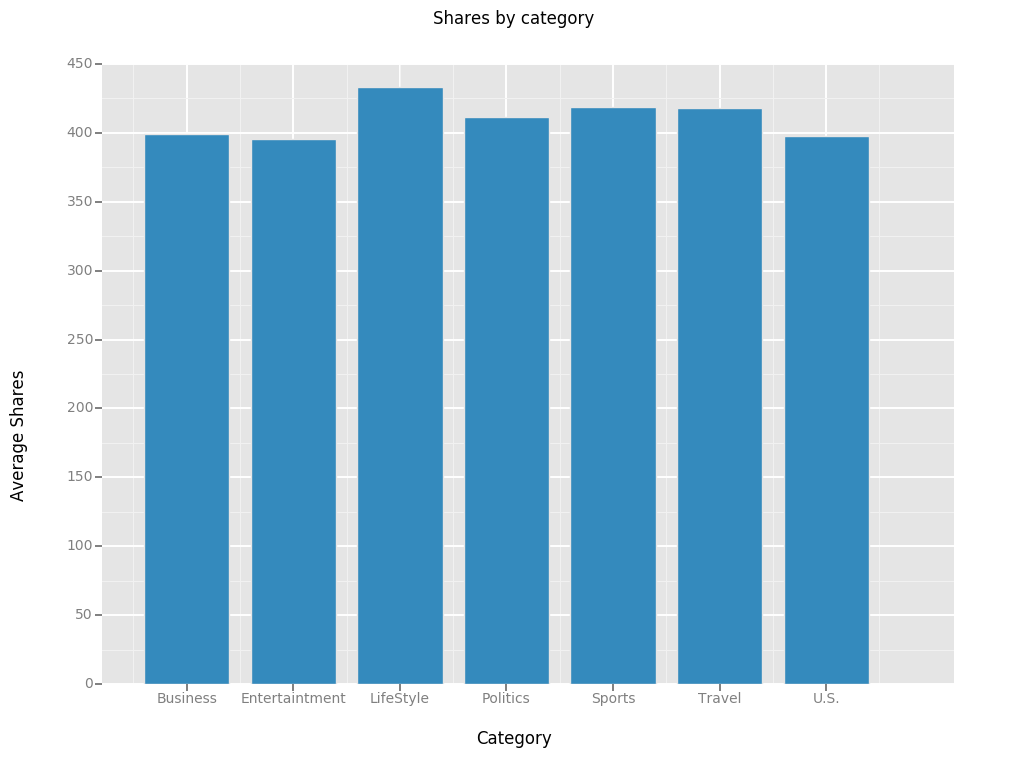

<ggplot: (120888585662)>

In [114]:
ggplot(aes(x="topic_name", weight="twitter"), twitter_mean) + geom_bar() + xlab("Category") + ylab("Average Shares") +ggtitle("Shares by category")